# Guided Project: Exploring Fandango Movie Ratings
The goal of this guided project is to investigate whether Fandango movie ratings are still inflated. In 2015, FiveThirtyEight published an [article](https://fivethirtyeight.com/features/fandango-movies-ratings/) by Walt Hickey that showed how Fandango had been artificially inflating their review scores. Unlike review websites such as Rotten Tomatoes and Metacritic, Fandango is a platform that sells tickets. Consequently, it has an incentive to make movies appear well reviewed in order to sell more tickets. 

Hickey's article demonstrated that Fandango movie scores were generally considerably higher than other review websites. On a five-star scale, almost no movies received lower than a 3, and most received a four or higher. Additionally, Hickey found that the scores on Fandango were always rounded up to the nearest halfpoint. For instance, a score of 3.1 stars would be rounded up to 3.5, instead of down to 3. 

## Data 

To answer our questions, we will compare the data used in the FiveThirtyEight article (available [here](https://github.com/fivethirtyeight/data/tree/master/fandango)) with more recent data collected by Dataquest (available [here](https://github.com/mircealex/Movie_ratings_2016_17)). 

In [350]:
import pandas as pd

In [351]:
old_r = pd.read_csv('Datasets/fandango_score_comparison.csv')

In [352]:
new_r = pd.read_csv('Datasets/movie_ratings_16_17.csv')

In [353]:
old_r.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [354]:
new_r.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [355]:
new_r.describe()

,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,2016.107477,53.266355,6.440654,53.621495,58.626168,3.894860,2.663318,3.220327,2.681075,2.931308,2.658879,3.214953,2.691589,2.915888
std,0.310444,17.843585,1.030056,30.242396,21.100040,0.516781,0.892179,0.515028,1.512120,1.055002,0.924619,0.526803,1.519273,1.060352
min,2016.000000,11.000000,3.500000,0.000000,11.000000,2.500000,0.550000,1.750000,0.000000,0.550000,0.500000,2.000000,0.000000,0.500000
25%,2016.000000,39.000000,5.825000,27.000000,43.250000,3.500000,1.950000,2.912500,1.350000,2.162500,2.000000,3.000000,1.500000,2.000000
50%,2016.000000,53.500000,6.500000,56.500000,60.500000,4.000000,2.675000,3.250000,2.825000,3.025000,2.500000,3.000000,3.000000,3.000000
75%,2016.000000,66.000000,7.200000,83.000000,76.750000,4.500000,3.300000,3.600000,4.150000,3.837500,3.500000,3.500000,4.000000,4.000000
max,2017.000000,99.000000,8.500000,99.000000,93.000000,5.000000,4.950000,4.250000,4.950000,4.650000,5.000000,4.000000,5.000000,4.500000


In [356]:
old_r.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,4.089041,3.845205,3.042466,3.193836,2.940411,...,3.368493,3.065068,3.226027,2.972603,3.270548,3.380137,185.705479,42846.205479,3848.787671,0.243836
std,30.168799,20.024430,19.517389,1.510712,0.958736,0.540386,0.502831,1.508440,1.001222,0.975869,...,0.479368,1.514600,1.007014,0.990961,0.788116,0.502767,316.606515,67406.509171,6357.778617,0.152665
min,5.000000,20.000000,13.000000,2.400000,4.000000,3.000000,2.700000,0.250000,1.000000,0.650000,...,2.000000,0.500000,1.000000,0.500000,1.000000,2.000000,4.000000,243.000000,35.000000,0.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,3.500000,3.500000,1.562500,2.500000,2.175000,...,3.150000,1.500000,2.500000,2.125000,3.000000,3.000000,33.250000,5627.000000,222.250000,0.100000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,4.000000,3.900000,3.175000,3.325000,2.950000,...,3.450000,3.000000,3.500000,3.000000,3.500000,3.500000,72.500000,19103.000000,1446.000000,0.200000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,4.500000,4.200000,4.450000,4.050000,3.750000,...,3.700000,4.500000,4.000000,4.000000,4.000000,3.500000,168.500000,45185.750000,4439.500000,0.400000
max,100.000000,94.000000,94.000000,9.600000,8.600000,5.000000,4.800000,5.000000,4.700000,4.700000,...,4.300000,5.000000,4.500000,4.500000,5.000000,4.500000,2375.000000,334164.000000,34846.000000,0.500000


From the descriptions in the README file on Github, the FiveTHirtyEight data contains information on all movies on Fandango with more than 30 fan reviews on August 24, 2015. There are 146 movies in total. 

Conversely, the newer data contains information on 214 popular movies released in 2016 and 2017 (through March 22). However, the exact cutoff point in popularity is unclear from the README file.

### Issue with Defining Popularity

The main issue with comparing the old and new datasets is that the new data does not precisely define what counts as a popular movie. The old dataset limits the data to movies with more than 30 reviews. However, it is quite possible that the new dataset used different criteria. This could mean that the datasets contain data on different types of movies (if, for instance, the new data only contains information on movies with more than 1,000 reviews) that could lead to incorrect conclusions about how Fandango's rating system has changed. 

Unfortunately, the new data does not contain information on the number of Fandango reviews. However, we can take a sample of movies from the new data, and manually look up the number of reviews they received. If most movies received more than 30 reviews, the datasets are probably similar enough to not substantially alter the results of our analysis. 

In [357]:
sample = new_r['movie'].sample(10, random_state=1)
sample

108                     Mechanic: Resurrection
206                                   Warcraft
106                                  Max Steel
107                              Me Before You
51     Fantastic Beasts and Where to Find Them
33                                        Cell
59                                      Genius
152                                      Sully
4                      A Hologram for the King
31                  Captain America: Civil War
Name: movie, dtype: object

Unfortunately, since Dataquest created this guided project, Fandango no longer makes its user reviews available on its website. Instead, the Rotten Tomatoes critics and audience scores appear. Because of this, we can no longer manually look up the reviews. However, Dataquest manually looked up the above sample before Fandango removed them, and found that 9/10 movies had more than 30 reviews. Overall, then, most movies in the new data probably have at least 30 reviews, so the types of movies selected in each dataset are not considerably different. 

## Analytic Approach 

Although it will be difficult to determine directly if Fandango has made a change in how it aggregates movie reviews, we suspect that a meaningful change would lead to its reviews becoming more similar to reviews from other sites. Consequently, we will compare the difference between discrepancy between Fandango and non-Fandango reviews in the old and new datasets. 

If Fandango scores in the new dataset align better with scores from other websites, than it is likely that Fandango changed its methodology. However, if the scores continue to diverge to the same degree, it is likely that Fandango did not make any meaningful changes. 

Additionally, Fandango reviews (at least in theory) come from the audience instead of critics, so the best comparisons to use are probably from the Rotten Tomatoes audience score and the IMDb score (which is the average score of audience reviews uploaded to the website). Based on my (limited) knowledge of movies, it seems that the audience and critical perception of movies often diverge considerably, so it would be better to compare audience scores. 

Below, we select the relevant columns for our analysis from the two datasets.

In [358]:
old_cols = old_r[['FILM','Fandango_Stars', 'RT_norm_round','RT_user_norm_round', 'Metacritic_norm_round','IMDB_norm_round']].copy()

In [359]:
new_cols = new_r[['movie','fandango','nr_metascore','nr_imdb','nr_tmeter','nr_audience']].copy()

In [360]:
old_cols['rt_audience_dif'] = old_cols['Fandango_Stars'] - old_cols['RT_user_norm_round']
old_cols['rt_critic_dif'] = old_cols['Fandango_Stars'] - old_cols['RT_norm_round']
old_cols['imdb_dif'] = old_cols['Fandango_Stars'] - old_cols['IMDB_norm_round']
old_cols['meta_dif'] = old_cols['Fandango_Stars'] - old_cols['Metacritic_norm_round']

In [361]:
new_cols['rt_audience_dif'] = new_cols['fandango'] - new_cols['nr_audience']
new_cols['rt_critic_dif'] = new_cols['fandango'] - new_cols['nr_tmeter']
new_cols['imdb_dif'] = new_cols['fandango'] - new_cols['nr_imdb']
new_cols['meta_dif'] = new_cols['fandango'] - new_cols['nr_metascore']

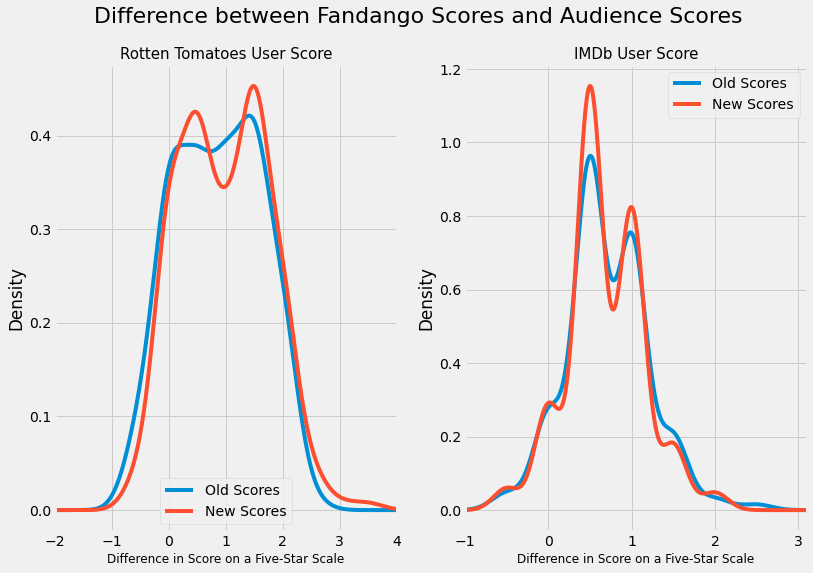

In [362]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Difference between Fandango Scores and Audience Scores', fontsize=22)

plt.subplot(1, 2, 1)
old_cols['rt_audience_dif'].plot.kde(legend=True, label='Old Scores')
new_cols['rt_audience_dif'].plot.kde(legend=True, label='New Scores')
plt.xlabel('Difference in Score on a Five-Star Scale', fontsize=12)
plt.xlim(-2,4)
plt.title('Rotten Tomatoes User Score', fontsize=15)

plt.subplot(1, 2, 2)
old_cols['imdb_dif'].plot.kde(legend=True, label='Old Scores')
new_cols['imdb_dif'].plot.kde(legend=True, label='New Scores')
plt.xlabel('Difference in Score on a Five-Star Scale', fontsize=12)
plt.xlim(-1,3.1)
plt.xticks(np.arange(-1,3.1,1))
plt.title('IMDb User Score', fontsize=15)

plt.show()

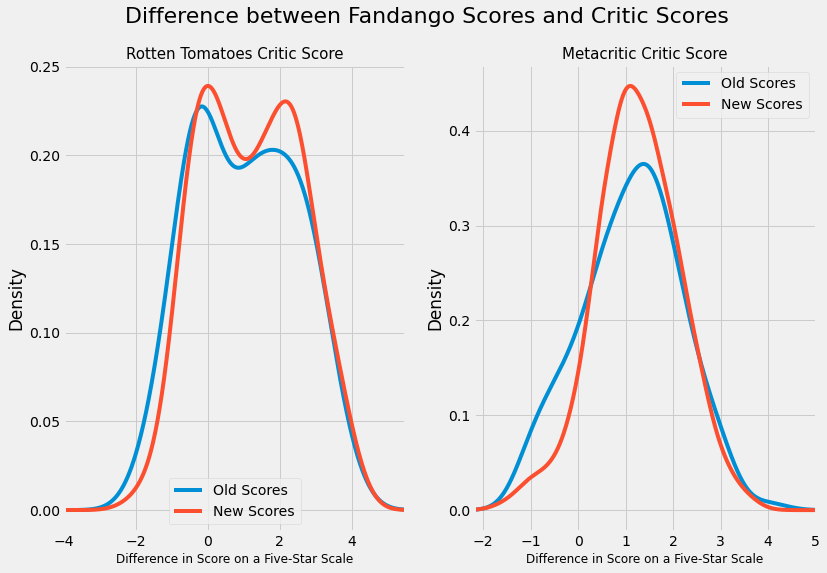

In [363]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Difference between Fandango Scores and Critic Scores', fontsize=22)

plt.subplot(1, 2, 1)
old_cols['rt_critic_dif'].plot.kde(legend=True, label='Old Scores')
new_cols['rt_critic_dif'].plot.kde(legend=True, label='New Scores')
plt.xlabel('Difference in Score on a Five-Star Scale', fontsize=12)
plt.xlim(-4,5.5)
plt.title('Rotten Tomatoes Critic Score', fontsize=15)

plt.subplot(1, 2, 2)
old_cols['meta_dif'].plot.kde(legend=True, label='Old Scores')
new_cols['meta_dif'].plot.kde(legend=True, label='New Scores')
plt.xlabel('Difference in Score on a Five-Star Scale', fontsize=12)
plt.xlim(-2.2,5)
# plt.xticks(np.arange(-1,3.1,1))
plt.title('Metacritic Critic Score', fontsize=15)

plt.show()

In [364]:
mean_vals_new = pd.DataFrame(new_cols.iloc[:,6:].mean())
mean_vals_old = pd.DataFrame(old_cols.iloc[:,6:].mean())

mean_vals_all = pd.merge(left=mean_vals_old, right = mean_vals_new, left_index=True, right_index=True)
mean_vals_all = mean_vals_all.rename(columns={'0_x': 'old_scores', '0_y': 'new_scores'})
mean_vals_all

,old_scores,new_scores
rt_audience_dif,0.863014,0.978972
rt_critic_dif,1.023973,1.203271
imdb_dif,0.708904,0.679907
meta_dif,1.116438,1.235981


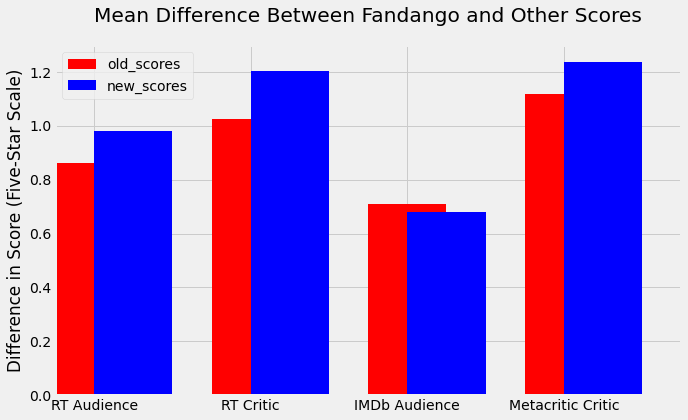

In [365]:
fig, ax = plt.subplots(figsize=(10,6))
mean_vals_all['old_scores'].plot.bar(color='red', align='center', legend=True)
mean_vals_all['new_scores'].plot.bar(color='blue', align='edge', legend=True)
plt.legend
plt.title('Mean Difference Between Fandango and Other Scores', y=1.05)
plt.xticks(rotation=0)
ax.set_xticklabels(['RT Audience','RT Critic','IMDb Audience', 'Metacritic Critic'])
plt.ylabel('Difference in Score (Five-Star Scale)')
plt.show()

In the graph above, we see the mean difference between Fandango movie scores and other scoring websites. There were large increases in the difference for critical scores (Rotten Tomatoes critical score and Metacritic). However, there is not a clear change in the difference between Fandango and audience scores as the difference between the Rotten Tomatoes audience score and Fandango increased, while the difference for IMDb decreased slightly. Neither critical nor audience scores, though, saw a clear decrease in score disparity that would suggest a meaningful change in Fandango's aggregation methods. 

## Dataquest Guided Project Analysis 
Below is my analysis following the Dataquest guided project instructions

In [366]:
new_fan = new_r[['movie', 'year', 'fandango']].copy()
old_fan = old_r[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()

In [367]:
old_fan.describe()

,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
count,146.000000,146.000000,146.000000,146.000000
mean,4.089041,3.845205,3848.787671,0.243836
std,0.540386,0.502831,6357.778617,0.152665
min,3.000000,2.700000,35.000000,0.000000
25%,3.500000,3.500000,222.250000,0.100000
50%,4.000000,3.900000,1446.000000,0.200000
75%,4.500000,4.200000,4439.500000,0.400000
max,5.000000,4.800000,34846.000000,0.500000


In [368]:
new_fan.describe()

,year,fandango
count,214.000000,214.000000
mean,2016.107477,3.894860
std,0.310444,0.516781
min,2016.000000,2.500000
25%,2016.000000,3.500000
50%,2016.000000,4.000000
75%,2016.000000,4.500000
max,2017.000000,5.000000


### Limiting the data to movies released in 2015 and 2016

In [369]:
d_16 = new_fan[ new_fan['year'] == 2016]

In [370]:
old_fan[['movie','year']] = old_fan['FILM'].str.split('(', expand=True)
old_fan['FILM'] = old_fan['movie']

In [371]:
old_fan.drop('movie', axis=1, inplace=True)

In [372]:
old_fan['year'] = old_fan['year'].str.replace(')','', regex=True).astype(int)

In [373]:
old_fan.head(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron,5.0,4.5,14846,0.5,2015
1,Cinderella,5.0,4.5,12640,0.5,2015
2,Ant-Man,5.0,4.5,12055,0.5,2015
3,Do You Believe?,5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2,3.5,3.0,1021,0.5,2015


In [374]:
old_fan['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [375]:
d_15 = old_fan[ old_fan['year'] == 2015]
d_16.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


In [376]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

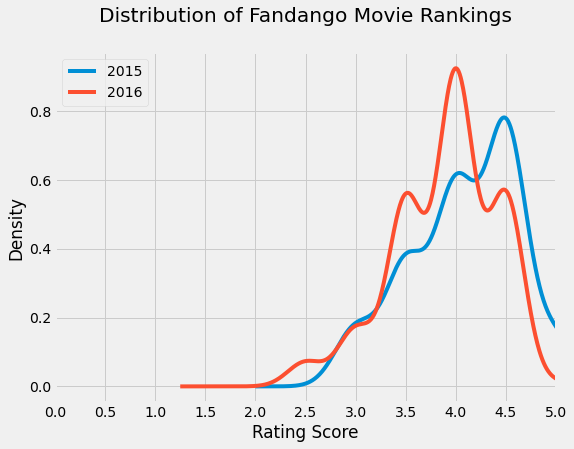

In [377]:
d_15['Fandango_Stars'].plot.kde(legend=True, label='2015', figsize=(8,6))
d_16['fandango'].plot.kde(legend=True, label='2016')
plt.xlabel('Rating Score')
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.title('Distribution of Fandango Movie Rankings',y = 1.07)
plt.xlim(0,5)
plt.show()

In [378]:
d_15['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [379]:
d_16["fandango"].value_counts(normalize=True).sort_index() *100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Here, we see that 2016 movies received considerably lower scores than 2015 movies. 

In [380]:
mean_2015 = d_15['Fandango_Stars'].mean()
mean_2016 = d_16['fandango'].mean()

median_2015 = d_15['Fandango_Stars'].median()
median_2016 = d_16['fandango'].median()

mode_2015 = d_15['Fandango_Stars'].mode()[0]
mode_2016 = d_16['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


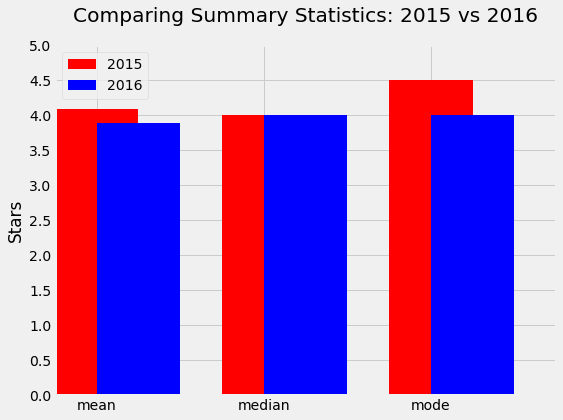

In [381]:
summary['2015'].plot.bar(color='red', align='center', legend=True, figsize=(8,6))
summary['2016'].plot.bar(color='blue', align='edge', legend=True)
plt.legend
plt.ylabel('Stars')
plt.title('Comparing Summary Statistics: 2015 vs 2016', y=1.05)
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 5.1, .5))
plt.show()